## 特征点匹配流程

1. 使用特征搜寻算法
     + `cv2.xfeatures2d.SIFT_create()`
     + `cv2.ORB_create()`
     + `cv2.xfeatures2d.SURF_create()`
     + `cv2.xfeatures2d.StarDetector_create()`
     
  得到img_train和img_query上特征点
  
2. 使用特征计算子分别得到img_train和img_query的特征点位置
    + `sift.detect(img, mask)`
    + `orb.detect(img, mask)`
    + `surf.detect(img, mask)`
    + `star.detect(img, mask)`
    
3. 使用特征描述子分别得到img_train和img_query的特征向量表示
    + `sift.compute(img, kps)`
    + `orb.compute(img, kps)`
    + `surf.compute(img, kps)`
    + `star.compute(img, kps)`
    + `cv2.xfeatures2d.BriefDescriptorExtractor_create().compute()`
    
4. 使用特征匹配算法得到img_train和img_query上对应匹配的特征
    + `cv2.BFMatcher()`
        + `bf.match(des_query, dex_train)`（一对一匹配）
        + `bf.knnMatch(des_query, dex_train)`(一对多匹配)
    + `cv2.FlannBaseMatcher()`
        + `flann.match(des_query, dex_train)`（一对一匹配）
        + `flann.knnMatch(des_query, dex_train)`(一对多匹配)
        
5. 展示特征点或对应匹配的特征点
    + `cv2.drawMatches()`
    + `cv2.drawMatchesKnn()`

**Brure-Force（蛮力）匹配**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

`cv2.imread()`

param flag:

1) CV_LOAD_IMAGE_UNCHANGED (<0)，以原始图像读取（包括alpha通道），

2) CV_LOAD_IMAGE_GRAYSCALE ( 0)，以灰度图像读取

3) CV_LOAD_IMAGE_COLOR (>0)，以RGB格式读取

In [8]:
def cv2_imread(img_path, flag=None):
    if flag is None or flag > 0:
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif flag == 0:
        img = cv2.imread(str(img_path), flag)
    else:
        msg = 'unknow flag code: {}'.format(flag)
        raise ValueError(msg)
    return img

def display_img(img, cmap=None):
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_subplot()
    if cmap is None or cmap == 'plamsa':
        ax.imshow(img)
    else:
        ax.imshow(img, cmap=cmap)
    plt.show()

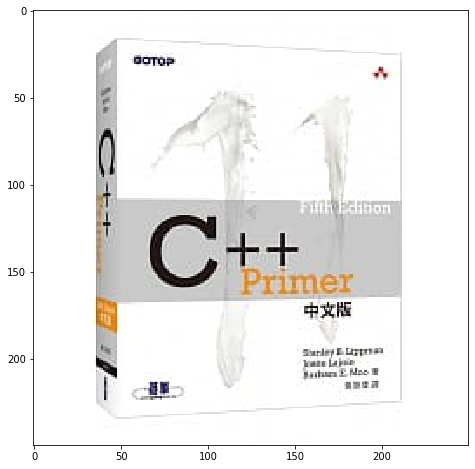

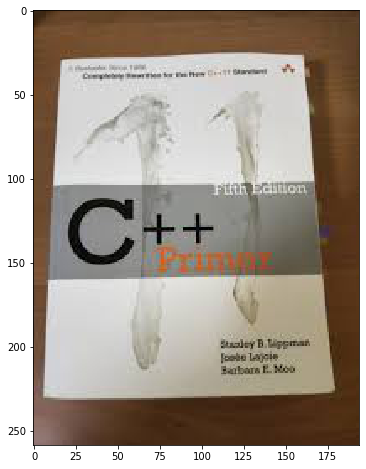

In [10]:
img_train = cv2_imread('./imgdata/cpp1.jpg')
img_query = cv2_imread('./imgdata/cpp2.jpg')

display_img(img_train)
display_img(img_query)

In [11]:
img_train = cv2.cvtColor(img_train, cv2.COLOR_RGB2GRAY)
img_query = cv2.cvtColor(img_query, cv2.COLOR_RGB2GRAY)

### BF单特征点匹配器
#### cv2.BFMatcher()

Brute-Force匹配器

+ 设置两个主要参数：
    + normType: 它指定要使用的距离量度。默认是cv2.NORM_L2。对于SIFT,SURF很好。（还有cv2.NORM_L1）。对于二进制字符串的描述子，比如ORB，BRIEF，BRISK等，应该用cv2.NORM_HAMMING。使用Hamming距离度量，如果ORB使用WTA_K = 3或者4，应该用cv2.NORM_HAMMING2
    + crossCheck: 默认是false，如果它是true，则匹配会更加严格，只有当img_train的第i个特征点与img_query中的第j个特征点距离最近，并且反过来也成立时【即img_query的第j个特征点到img_train的第i个特征点也是最近的】才能成功匹配

### 单特征点匹配函数
<div class="alert alert-block alert-success"> 
 <b>img A上某个特征点在img B上有且只有一个相对应的特征点</b>!
</div>

#### bf.match(queryDescriptors, trainDescriptors[, mask])

+ Inputs:
    + queryDescriptors
    + trainDescriptors

+ Returns:[返回一个由DMatch对象组成的列表，这个DMatch对象具有如下性质]

    + DMatch.distance: 描述符之间的距离，越小表示越匹配
    + DMatch.trainIdx: 目标图像中描述符的索引
    + DMatch.queryIdx: 查询图像中描述符的索引
    + DMatch.imgIdx: 目标图像的索引

### 单特征点展示
#### cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches1to2, outImg[, matchColor[, singlePointColor[, matchesMask[, flags]]]])
+ img1, 
+ keypoints1:从img1中提取的特征点 
+ img2, 
+ keypoints2:从img2中提取的特征点
+ matches1to2:元素为DMatch对象的列表，形如:[<DMatch 0x7fb0d5b207d0>,<DMatch 0x7fb0a2527d70>, ...]
+ outImg
+ matchColor:特征点连接线的颜色
+ singlePointColor:特征点的颜色
+ matchesMask:Mask determining which matches are drawn. If the mask is empty, all matches are drawn.
+ flags:
    + DRAW_MATCHES_FLAGS_DEFAULT 
    + DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
    + DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    + DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

In [12]:
print([i for i in dir(cv2) if i.startswith('DRAW_MATCHES')])

['DRAW_MATCHES_FLAGS_DEFAULT', 'DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG', 'DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS', 'DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS']


## 对ORB描述符进行蛮力匹配（单特征点）

186


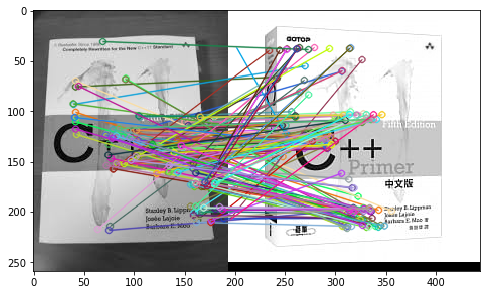

In [16]:
orb = cv2.ORB_create()

# 计算查询图像和目标图像上的特征点
kp_train, des_train = orb.detectAndCompute(img_train, None)
kp_query, des_query = orb.detectAndCompute(img_query, None)

# 匹配特征点
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des_train, des_query)

# 对特征点进行排序
matches_sorted = sorted(matches, key=lambda x: x.distance)
print(len(matches_sorted))

# draw
img_match = cv2.drawMatches(
                img_query.copy(), 
                kp_train, 
                img_train.copy(), 
                kp_query, 
                matches_sorted, 
                None, 
                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)


display_img(img_match)

### 多特征点匹配函数
#### bf.knnMatch(queryDescriptors, trainDescriptors, k[, mask[, compactResult]])

<div class="alert alert-block alert-success"> 
 <b>在img A上某个特征点在img B上可以有多个相对应的特征点</b>!
</div>

+ queryDescriptors:注意第一个未知参数为img_query 
+ trainDescriptors:
+ k:每个特征点可以匹配的个数
+ mask
+ compactResult


### 多特征点展示
#### cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches1to2, outImg[, matchColor[, singlePointColor[, matchesMask[, flags]]]])
它把两个图像水平堆叠并且从第一个图像画线到第二个图像来显示匹配。如果k=2，它会给每个关键点画两根匹配线.
当使用knn匹配器时在显示匹配的特征点时需要使用cv2.drawMatchesKnn()

+ img1:
+ keypoints1:从img1中提取的特征点
+ img2:
+ keypoints2:从img2中提取的特征点 
+ matches1to2:元素为DMatch对象的列表，当k=2时形如:[[<DMatch 0x7fb0d5b207d0>,<DMatch 0x7fb0a2527d70>], ...]
+ outImg:将结果输出到指定的图像，如果不需要可直接设置为None
+ matchColor:特征点连接线的颜色
+ singlePointColor:特征点的颜色
+ matchesMask:Mask determining which matches are drawn. If the mask is empty, all matches are drawn.
+ flags:
    + DRAW_MATCHES_FLAGS_DEFAULT 
    + DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG
    + DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    + DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS

## 对ORB描述符进行蛮力匹配（多特征点）

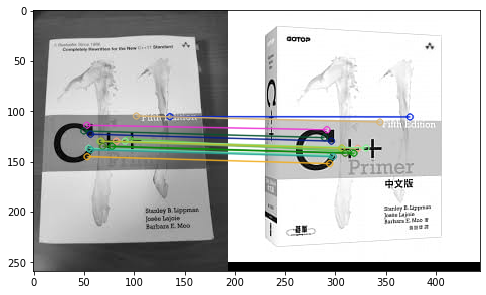

In [19]:
orb = cv2.ORB_create()

# 计算特征点
kp_train, des_train = orb.detectAndCompute(img_train, None)
kp_query, des_query = orb.detectAndCompute(img_query, None)

# 创建BF特征匹配器
bf = cv2.BFMatcher()
# bf.knnMatch()返回M个元素，每个元素包含k个值。
# matches的第i个元素的第一个元素表示与第i个特征点距离最近的特征点，第二个元素表示与第i个特征点次近距离的点
matches = bf.knnMatch(des_query, des_train, k=2)

# 比值测试，首先获取与A距离最近的点B和次近点C，只有当dis(A, B) / dis(B, C)小于阈值（0.75）时才认为是匹配
# 因为假设匹配是一一对应的，绝对意义上的匹配应该：dis(A, B) = dis(B, C)
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])


# draw
img_match = cv2.drawMatchesKnn(
                img_query.copy(), # query image
                kp_query, 
                img_train.copy(), # train image
                kp_train, 
                good, 
                None, 
                flags=2)


display_img(img_match)

## 对SIFT描述符进行蛮力匹配（多特征点）

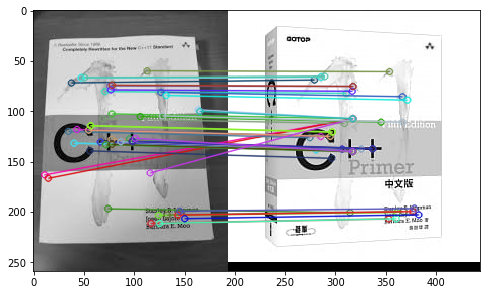

In [24]:
sift = cv2.xfeatures2d.SIFT_create()
kps_train, des_train = sift.detectAndCompute(img_train, None)
kps_query, des_query = sift.detectAndCompute(img_query, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des_query, des_train, k=2)

good = []
for feature_point_1, feature_point_2 in matches:
    if feature_point_1.distance < 0.75 * feature_point_2.distance:
        good.append([feature_point_1])

img_match = cv2.drawMatchesKnn(img_query.copy(), 
                               kps_query, 
                               img_train.copy(), 
                               kps_train, 
                               good[:],
                               None, 
                               flags=2)
display_img(img_match)

<div class="alert alert-block alert-success"> 
 <b>FLANN是一个对大数据集和高维特征进行近邻搜索的算法集合，在面对大数据集时它的效果要好于BFMatcher</b>!
</div>

`cv2.FlannBasedMatcher()`

使用FLANN匹配，我们需要传入两个字典作为参数。这两个用来确定要使用的算法和其他相关参数。

+ Inputs：
    + IndexParams:dict(algorithm=scalar[integer], tree=5)
    + SearchParams:用它来指定递归遍历的次数，值越高越准确，消耗的时间也越多：dict(checks=100)
    
`flann.knnMatch(queryDescriptors, trainDescriptors, k[, mask[, compactResult]])`
+ queryDescriptors:注意第一个未知参数为img_query 
+ trainDescriptors:
+ k:每个特征点可以匹配的个数
+ mask
+ compactResult

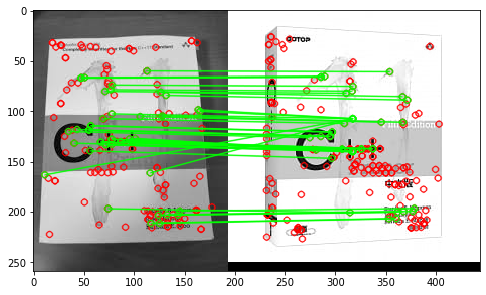

In [29]:
sift = cv2.xfeatures2d.SIFT_create()
kps_train, des_train = sift.detectAndCompute(img_train, None)
kps_query, des_query = sift.detectAndCompute(img_query, None)

# 创建Flann特征匹配器
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des_query, des_train, k = 2)
matchesMask = [[0, 0] for _ in range(len(matches))]
for idx, (feature1, feature2) in enumerate(matches):
    if feature1.distance < 0.7 * feature2.distance:
        matchesMask[idx] = [1, 0]

# 画出每张图片上找到的所有匹配到的特征点，但只对符合要求的匹配进行连线
draw_params = dict(matchColor=(0,255,0), 
                   singlePointColor = (255, 0, 0), 
                   matchesMask = matchesMask, 
                   flags = 0)

match_img = cv2.drawMatchesKnn(img_query.copy(), 
                               kps_query, 
                               img_train.copy(),
                               kps_train, 
                               matches, 
                               None, 
                               **draw_params)
display_img(match_img)